In [2]:
import pandas as pd 
import numpy as np 
import os 
import json 
import matplotlib.pyplot as plt
#from sklearn.preprocessing import 

#raw_path = "/home/ihsan/Documents/thesis_generator/results/devin/to_process/" #needs the absolute path, no tildes! 
#processed_path = "/home/ihsan/Documents/thesis_generator/results/devin"

#usb drive
#raw_path = '/media/ihsan/LID_FLASH_1/Thesis/thesis_generator/results/run_2/'

raw_path = "/home/ihsan/Documents/thesis_generator/results/to_process/"

processed_path = "/home/ihsan/Documents/thesis_models/unsplit"
#processed_path = '/media/ihsan/LID_FLASH_1/Thesis/thesis_generator/results/run_2/processed/'
items = os.listdir(raw_path)
items.sort()
print(type(items))
for file in items:
    if ('.csv') not in str(file):
        del items[items.index(file)]   
print(items)

seq_length_dict = {}
seq_length_dict_filename = processed_path + "/sequence_lengths.json"
#suffix = "3a"
#csv_path = "~/Documents/thesis_generator/results/devin/crack_growth_sequence" + suffix + ".csv"
sequence_lengths = {} #save sequence lengths as a dict. or maybe a json?

<type 'list'>
['crack_growth_sequence1c_0.csv', 'crack_growth_sequence1c_1.csv', 'crack_growth_sequence1c_2.csv', 'crack_growth_sequence1c_3.csv', 'crack_growth_sequence1c_4.csv', 'crack_growth_sequence1c_5.csv']


In [5]:
file = items[0]

print(str(file))
csv_path = raw_path + str(file)
if ("_0.") in str(file): #only the first file in the series has a header. 
    cg_seq_df = pd.read_csv(csv_path)
    header_names = cg_seq_df.columns.values
else:
    cg_seq_df = pd.read_csv(csv_path,names=header_names)
    print(cg_seq_df.columns.values)

train_list = ['StepIndex','delta_K_current_1','crack_length_1','delta_K_current_2','crack_length_2',
      'delta_K_current_3','crack_length_3','delta_K_current_4','crack_length_4','Load_1','Load_2'] #and seq_id,somehow 

label_list = ['StepIndex','delta_a_current_1','delta_a_current_2','delta_a_current_3','delta_a_current_4']

train_df = cg_seq_df[train_list]

label_train_df = cg_seq_df[label_list]

#labels_csv_path = "~/Documents/thesis_generator/results/devin/label" + suffix + "_headers"+ ".csv"
#train_csv_path = "~/Documents/thesis_generator/results/devin/train" + suffix + "_headers" + ".csv"

indices = train_df[train_df['StepIndex']==1].index.tolist()
indices.append(train_df.shape[0]-1)
indices_offset_min1 = [i-1 for i in indices]
print("file {}'s indices_offset_min1 {}".format(str(file),indices_offset_min1))
indices_offset_min1.pop(0)
print("indices: {}, indices_offset_min1: {}".format(indices,indices_offset_min1))

ranges = [(t,s) for t,s in zip(indices,indices_offset_min1)]
#print("before changing :{}".format(ranges))
'''for tuple in ranges:
    print(tuple)
    tuple[1:][0] = (tuple[1:][0]) + 1'''

#ranges[1:][0] = ranges[1:][0] + 1
print("\nafter changing :{} ".format(ranges))
#print("lengths: {} ".format([indices[4]-indices[3],indices[3]-indices[2],indices[2]-indices[1],indices[1]-indices[0]]))
print("lengths: {} ".format([t-s for (s,t) in ranges]))


crack_growth_sequence1c_0.csv
file crack_growth_sequence1c_0.csv's indices_offset_min1 [-1, 83554, 167163, 250704, 334236, 417787, 501302, 584803, 668284, 751817, 835270]
indices: [0, 83555, 167164, 250705, 334237, 417788, 501303, 584804, 668285, 751818, 835271], indices_offset_min1: [83554, 167163, 250704, 334236, 417787, 501302, 584803, 668284, 751817, 835270]

after changing :[(0, 83554), (83555, 167163), (167164, 250704), (250705, 334236), (334237, 417787), (417788, 501302), (501303, 584803), (584804, 668284), (668285, 751817), (751818, 835270)] 
lengths: [83554, 83608, 83540, 83531, 83550, 83514, 83500, 83480, 83532, 83452] 


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 27300 to 27371
Data columns (total 12 columns):
StepIndex            72 non-null int64
delta_K_current_1    72 non-null float64
crack_length_1       72 non-null float64
delta_K_current_2    72 non-null float64
crack_length_2       72 non-null float64
delta_K_current_3    72 non-null float64
crack_length_3       72 non-null float64
delta_K_current_4    72 non-null float64
crack_length_4       72 non-null float64
Load_1               72 non-null float64
Load_2               72 non-null float64
percent_damage       72 non-null float64
dtypes: float64(11), int64(1)
memory usage: 6.8 KB
(       StepIndex  delta_K_current_1  crack_length_1  delta_K_current_2  \
27300      27301           7.841846        0.147205           7.968595   
27301      27302           9.142090        0.147206           8.740580   

       crack_length_2  delta_K_current_3  crack_length_3  delta_K_current_4  \
27300        0.147089           7.851458      

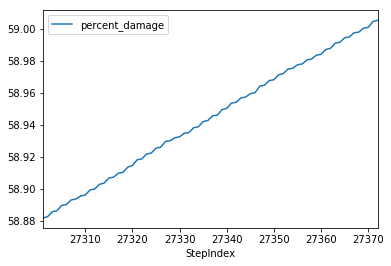

['StepIndex' 'delta_K_current_1' 'crack_length_1' 'delta_K_current_2'
 'crack_length_2' 'delta_K_current_3' 'crack_length_3' 'delta_K_current_4'
 'crack_length_4' 'Load_1' 'Load_2' 'percent_damage']
after changing: ['StepIndex' 'percent_damage' 'delta_K_current_1' 'crack_length_1'
 'delta_K_current_2' 'crack_length_2' 'delta_K_current_3' 'crack_length_3'
 'delta_K_current_4' 'crack_length_4' 'Load_1' 'Load_2']
after dropping StepIndex: ['percent_damage' 'delta_K_current_1' 'crack_length_1' 'delta_K_current_2'
 'crack_length_2' 'delta_K_current_3' 'crack_length_3' 'delta_K_current_4'
 'crack_length_4' 'Load_1' 'Load_2'], RangeIndex(start=27300, stop=27372, step=1)
         StepIndex  delta_a_current_1  delta_a_current_2  delta_a_current_3  \
count  83608.00000       83608.000000       83608.000000       83608.000000   
mean   41804.50000           0.000004           0.000004           0.000006   
std    24135.69499           0.000003           0.000003           0.000005   
min        1

In [12]:
plt.clf()
plt.close()
#take a subset and play 
#print(ranges[0][0],ranges[0][1])
#train_df_play = train_df[0:27372]
train_df_play = train_df[27300:27372]
label_df_play = label_train_df[83555:167163]
#print(train_df_play.head(1))
#train_df_play=train_df_play.applymap(np.log)
#print(train_df_play.head(1),train_df_play.index,train_df_play.info())

threshold = 0.25
#longest_crack = 
#print(longest_crack)
#print(train_df_play[['crack_length_1','crack_length_2','crack_length_3','crack_length_4']].max(axis=1))
train_df_play['percent_damage'] = train_df_play[['crack_length_1','crack_length_2','crack_length_3','crack_length_4']].max(axis=1)/threshold * 100
print(train_df_play.head(2),train_df_play.index,train_df_play.info())

train_df_play.plot(x='StepIndex',y='percent_damage')
plt.show()

list_cols = train_df_play.columns.values
print(list_cols)

train_df_play = train_df_play[['StepIndex', 'percent_damage','delta_K_current_1','crack_length_1','delta_K_current_2',
 'crack_length_2','delta_K_current_3','crack_length_3','delta_K_current_4',
                              'crack_length_4','Load_1','Load_2']]
print("after changing: {}".format(train_df_play.columns.values))
train_df_play.to_csv('/home/ihsan/Documents/thesis_models/with_stepindex.csv')
train_df_play_dropped_stepindex = train_df_play[['percent_damage','delta_K_current_1','crack_length_1','delta_K_current_2',
 'crack_length_2','delta_K_current_3','crack_length_3','delta_K_current_4',
                              'crack_length_4','Load_1','Load_2']]
print("after dropping StepIndex: {}, {}".format(train_df_play_dropped_stepindex.columns.values,train_df_play_dropped_stepindex.index))
#print(label_df_play[['delta_a_current_1','delta_a_current_2','delta_a_current_3','delta_a_current_4']].info())
print(label_df_play.describe())
print(label_df_play[['delta_a_current_1']].mean())
#train_df_play_dropped_stepindex.to_csv('/home/ihsan/Documents/thesis_models/without_stepindex.csv')

In [ ]:
i = 0
for indices_as_tuples in ranges:
    i=i+1
    print("indices as tuples: {}".format(indices_as_tuples))
    train_df_as_np_array = train_df[indices_as_tuples[0]:indices_as_tuples[1]].values
    label_train_df_as_np_array = label_train_df[indices_as_tuples[0]:indices_as_tuples[1]].values
    print("df_as_np_array shape: {}".format(train_df_as_np_array.shape))
    print("file: {}".format(file))
    identifier = str(str(file)[-8:-6]) #eg 1a 2a etc. #you can use a regex. 
    print("identifier: {}".format(identifier))

    #j is sequence id. #i is the sequence number within the csv. 
    np_train_path = processed_path + "/sequence_" + identifier + "_" + str(j) + "_" + str(i) + ".npy"
    np_label_train_path = processed_path + "/sequence_" + identifier + "_" + str(j) + "_" + str(i) + "_label_.npy"
    seq_length_dict["sequence_" + identifier + "_" + str(j) + "_" + str(i)] = indices_as_tuples[1] - indices_as_tuples[0]
    #seq_length_dict = json.load(open(seq_length_dict))
    #UNCOMMENT THESE IF YOU WANT TO SAVETHE ARRAYS!!!
    print("np_train_path: {}".format(np_train_path))
    print("np_label_train_path :{}".format(np_label_train_path))
    #np.save(np_train_path,train_df_as_np_array)
    #np.save(np_label_train_path,label_train_df_as_np_array)
    j= j + 1
        
print(seq_length_dict)
json.dump(seq_length_dict, open(seq_length_dict_filename, 'wb'))